In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot
#
N=4000

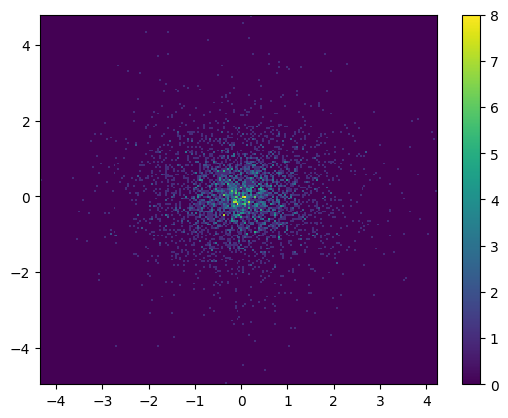

In [2]:
def sersic(Ie, re, r, n):
    bn = 2*n - 1/3
    return Ie * np.exp(-bn*((r/re)**(1/n)-1))

def prob(Ie, re, r, n):
    return sersic(Ie, re, r, n) * 2*np.pi*r
    
n = 1; re = 1; Ie = 1
rmax = 5*re
r = np.random.uniform(0,rmax,5*N)
p = np.random.uniform(0,prob(1, re, re, n),5*N)

mask = p <= prob(1, re, r, n)
r = (r[mask])[:N]

theta = np.random.uniform(0,2*np.pi,N)
rx = r*np.cos(theta)
ry = r*np.sin(theta)

plt.hist2d(rx, ry, bins=200)
plt.colorbar();
x1 = [rx, ry]
x1 = np.stack(np.rot90(x1))

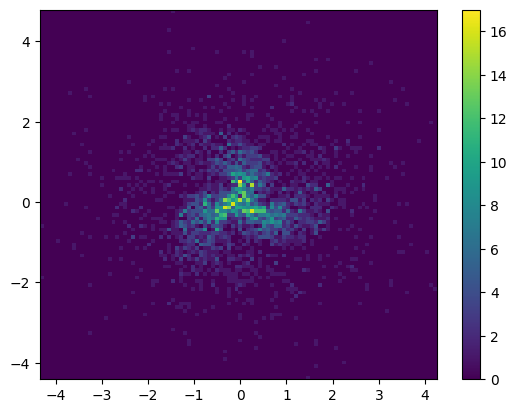

In [3]:
def spiral(r, phi, Ie, re, n, Na, w, p):
    return sersic(Ie, re, r, n) * (1 + w*np.sin(Na/np.tan(p) * np.log10(r) - Na*phi))

def spiralprob(r, phi, Ie, re, n, Na, w, p):
    return spiral(r, phi, Ie, re, n, Na, w, p) * r
    
n = 1; re = 1; Ie = 1; Na = 3; w = 0.8; p = 50*np.pi/180
rmax = 5*re
r = np.random.uniform(0,rmax,5*N)
phi = np.random.uniform(0,2*np.pi,5*N)

p = np.random.uniform(0,np.max(spiralprob(r, phi, Ie, re, n, Na, w, p)),5*N)

mask = p <= spiralprob(r, phi, Ie, re, n, Na, w, p)
r = (r[mask])[:N]
phi = (phi[mask])[:N]

rx = r*np.cos(phi)
ry = r*np.sin(phi)

plt.hist2d(rx, ry, bins=100)
plt.colorbar();

x2 = [rx, ry]
x2 = np.stack(np.rot90(x2))

In [4]:
d = 2

measures_locations = [x1, x2]
measures_weights = [ot.unif(x1.shape[0]), ot.unif(x2.shape[0])]

/Users/annasophiamaxen/Library/Python/3.9/lib/python/site-packages/ot/lp/__init__.py:388: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


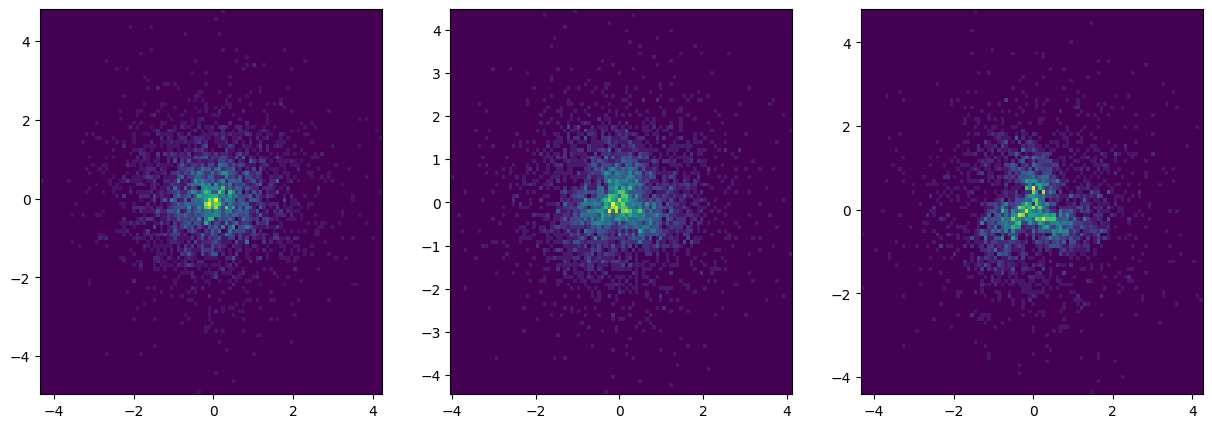

In [ ]:
alphas = np.linspace(0,1,100)
weights = [1-alphas, 0]

k = N  # number of Diracs of the barycenter
X_init = np.random.normal(0.0, 1.0, (k, d))  # initial Dirac locations
b = (
    np.ones((k,)) / k
)  # weights of the barycenter (it will not be optimized, only the locations are optimized)
X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b, numItermax= 800)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].hist2d(x1[:, 0], x1[:, 1], bins=100)
ax[1].hist2d(X[:, 0], X[:, 1], bins=100)
ax[2].hist2d(x2[:, 0], x2[:, 1],bins=100)
plt.show()

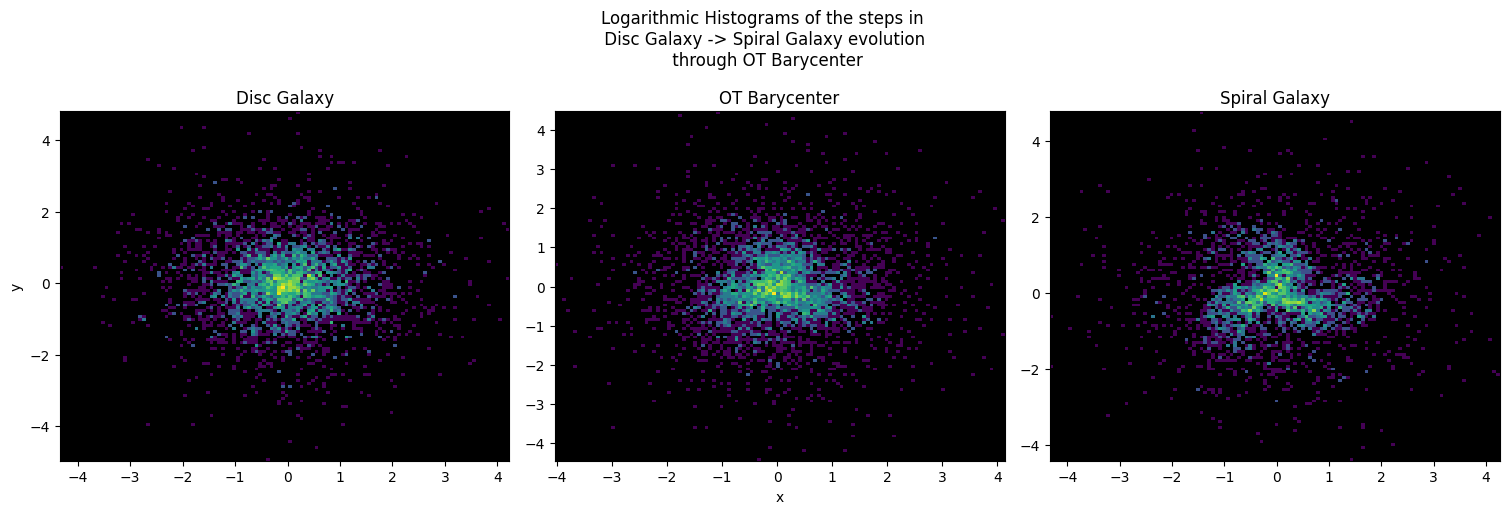

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Logarithmic Histograms of the steps in \n Disc Galaxy -> Spiral Galaxy evolution \n through OT Barycenter')
ax[0].hist2d(x1[:, 0], x1[:, 1], bins=120, norm = plt.cm.colors.LogNorm())
ax[1].hist2d(X[:, 0], X[:, 1], bins=120, norm = plt.cm.colors.LogNorm())
ax[2].hist2d(x2[:, 0], x2[:, 1], bins=120, norm=plt.cm.colors.LogNorm())
ax[0].set_title('Disc Galaxy')
ax[1].set_title('OT Barycenter')
ax[2].set_title('Spiral Galaxy')
for a in ax:
    a.set_facecolor('black')
plt.tight_layout()
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')

plt.show()

In [6]:
alphas = np.linspace(0,1,100)
weights = [0, 1-alphas]
k = N

for weight in weights:
    X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b, numItermax= 800)
    


KeyboardInterrupt: 

In [ ]:
from scipy.optimize import curve_fit

def exp(x, a, b):
    return b+a**x

n_list = np.linspace(1, 5000, 100000)


t = np.array([2, 20, 63, 162])
n = np.array([1000, 2000, 3000, 4000])

par, cov = curve_fit(exp, n, t)

t_list = exp(n_list, *par )

plt.plot(n,t)
plt.plot(n_list, t_list)